In [0]:
# Load Required Libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 


import seaborn as sns   # Heatmap plot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

In [0]:
# Read Dataset csv file
rawdataset = pd.read_csv('dataset\dataset.csv') 

In [0]:
# List column Name Details of original dataset
rawdataset.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status',
       'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'annual_inc_merged', 'dti_merged', 'annual_inc_joint', 'dti_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')

In [0]:
# List column Name and datatype Details of original dataset
rawdataset.dtypes

id                              int64
loan_amnt                       int64
term                           object
int_rate                      float64
installment                   float64
grade                          object
emp_length                      int64
home_ownership                 object
annual_inc                    float64
loan_status                    object
pymnt_plan                     object
purpose                        object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
mths_since_last_delinq        float64
mths_since_last_record        float64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                    float64
total_acc                       int64
collections_12_mths_ex_med    float64
policy_code                     int64
application_type               object
annual_inc_m

In [0]:
# Extract list of Numeric columns
numerics_col_list = [x for x in rawdataset.columns if(rawdataset[x].dtype == np.float64 or rawdataset[x].dtype == np.int64)]

# Create a subset of Numerical Data for visualization
subsetnumericdf = rawdataset[numerics_col_list]

# Remove id column ---> Not required for statistical Analysis
subsetnumericdf=subsetnumericdf.drop(['id'],axis=1)


In [0]:
# Iterate each column of Numerical data and Find Number of Null Values in 
totalcols = len(subsetnumericdf)
for col in subsetnumericdf.columns:
    percentageempty = subsetnumericdf[col].isnull().sum(axis=0) / totalcols
    print (col,subsetnumericdf[col].isnull().sum(axis=0),percentageempty)

loan_amnt 0 0.0
int_rate 0 0.0
installment 0 0.0
emp_length 0 0.0
annual_inc 0 0.0
dti 0 0.0
delinq_2yrs 0 0.0
inq_last_6mths 0 0.0
mths_since_last_delinq 446356 0.513103594148
mths_since_last_record 736327 0.846436544302
open_acc 0 0.0
pub_rec 0 0.0
revol_bal 0 0.0
revol_util 457 0.000525339286412
total_acc 0 0.0
collections_12_mths_ex_med 56 6.43741795166e-05
policy_code 0 0.0
annual_inc_merged 0 0.0
dti_merged 0 0.0
annual_inc_joint 869470 0.99948960472
dti_joint 869472 0.999491903797
acc_now_delinq 0 0.0
tot_coll_amt 67461 0.077549045078
tot_cur_bal 67461 0.077549045078
open_acc_6m 856626 0.984724926832
open_il_6m 856626 0.984724926832
open_il_12m 856626 0.984724926832
open_il_24m 856626 0.984724926832
mths_since_rcnt_il 856980 0.98513186361
total_bal_il 856626 0.984724926832
il_util 858305 0.986655002678
open_rv_12m 856626 0.984724926832
open_rv_24m 856626 0.984724926832
max_bal_bc 856626 0.984724926832
all_util 856626 0.984724926832
total_rev_hi_lim 67461 0.077549045078
inq_fi 85

In [0]:
# Drop Sparse Columns to analyze them seperately and useless Column
subsnumericdfclean =  subsetnumericdf.drop(['mths_since_last_delinq','mths_since_last_record','annual_inc_joint',
                      'policy_code','dti_joint', 'open_acc_6m', 
                      'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
                      'total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc',
                      'all_util','inq_fi','total_cu_tl','inq_last_12m'],axis=1)
                                            
# Fill Null Values
for col in subsnumericdfclean.columns:
    if subsnumericdfclean[col].isnull().sum(axis=0) > 0 :
        meanval = subsnumericdfclean[col].mean()
        subsnumericdfclean[col] = subsnumericdfclean[col].fillna(meanval,inplace=False)

        

In [0]:
# Print Min, Max, Mean of the column vectors
for col in subsnumericdfclean.columns:
     print(col,subsnumericdfclean[col].min(), subsnumericdfclean[col].max(), subsnumericdfclean[col].mean())
    

loan_amnt 500 35000 14759.031639909232
int_rate 5.32 28.99 13.236582052979184
installment 15.69 1445.46 436.7434627332326
annual_inc 0.0 9500000.0 74999.07521406758
dti 0.0 9999.0 18.147661849332028
delinq_2yrs 0 39 0.3131757851925593
inq_last_6mths 0 8 0.6836193002986503
open_acc 0 90 11.545470011978196
pub_rec 0 86 0.19491581926489285
revol_bal 0 2904836 16887.17102955005
revol_util 0.0 892.3 55.07304695919637
total_acc 2 169 25.268647245589793
collections_12_mths_ex_med 0.0 20.0 0.014305783242782156
acc_now_delinq 0 14 0.0050050924574153305
tot_coll_amt 0.0 9152545.0 225.44732464083532
tot_cur_bal 0.0 8000078.0 139457.1542943508
total_rev_hi_lim 0.0 9999999.0 32076.06922149935


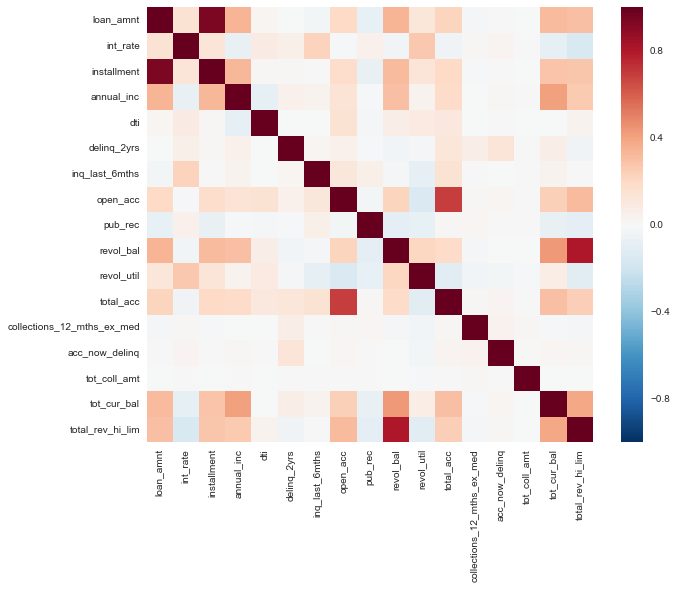

In [0]:
# Plot Correlation Matrix heatmap to Visualize correlations
f, ax = plt.subplots(figsize=(10, 8))
corr = subsnumericdfclean.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [0]:
# Identify Highly Correalted variables (Remove Correlated variables)
def get_redundant_pairs(df):
#    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(subsnumericdfclean, 20))

Top Absolute Correlations
loan_amnt    installment         0.944870
revol_bal    total_rev_hi_lim    0.805973
open_acc     total_acc           0.694707
revol_bal    tot_cur_bal         0.434069
annual_inc   tot_cur_bal         0.410516
tot_cur_bal  total_rev_hi_lim    0.384334
loan_amnt    revol_bal           0.337044
             annual_inc          0.336349
installment  annual_inc          0.329531
             revol_bal           0.319408
loan_amnt    tot_cur_bal         0.316577
open_acc     total_rev_hi_lim    0.314364
loan_amnt    total_rev_hi_lim    0.300044
total_acc    tot_cur_bal         0.299473
annual_inc   revol_bal           0.298845
installment  tot_cur_bal         0.286592
             total_rev_hi_lim    0.275341
int_rate     revol_util          0.270100
annual_inc   total_rev_hi_lim    0.263381
total_acc    total_rev_hi_lim    0.245625
dtype: float64


In [0]:
# Plot Visualizations to describe data
for col in subsnumericdfclean.columns:
     print(col,subsnumericdfclean[col].mean(), subsnumericdfclean[col].median(), subsnumericdfclean[col].std(), subsnumericdfclean[col].kurt())



loan_amnt 14759.031639909232 13000.0 8428.197356939041 -0.254635877915
int_rate 13.236582052979184 12.99 4.381739048788342 -0.158081376491
installment 436.7434627332326 382.55 243.90996308831902 0.692156756036
annual_inc 74999.07521406758 65000.0 64026.76506291883 4681.2658892
dti 18.147661849332028 17.64 17.31777455917798 253681.039279
delinq_2yrs 0.3131757851925593 0.0 0.8600775149404092 58.0379568726
inq_last_6mths 0.6836193002986503 0.0 0.9661879439741735 3.24626169903
open_acc 11.545470011978196 11.0 5.308408805945488 3.10590198351
pub_rec 0.19491581926489285 0.0 0.5814898532781978 1014.74280772
revol_bal 16887.17102955005 11887.0 22198.712711431195 1029.84424143
revol_util 55.07304695919637 56.0 23.801314950389884 1.04077587547
total_acc 25.268647245589793 24.0 11.82289713394332 1.37776202373
collections_12_mths_ex_med 0.014305783242782156 0.0 0.13402496588352678 1122.9190258
acc_now_delinq 0.0050050924574153305 0.0 0.07780564129349074 1644.59120431
tot_coll_amt 225.4473246408353

In [0]:
# Conditions Cateory subset
columnscond       = ['loan_amnt','term','int_rate','grade','purpose']
subset_conditions = pd.DataFrame(rawdataset,columns=columnscond)

# Conditions Class Encoded 
subset_conditions = pd.get_dummies(subset_conditions,columns=['term'])
subset_conditions = pd.get_dummies(subset_conditions,columns=['grade'])
subset_conditions = pd.get_dummies(subset_conditions,columns=['purpose'])




In [0]:
# # Conditions Cateory subset
columnscapactity  = ['emp_length','annual_inc_merged','dti_merged']
subset_capacity   = pd.DataFrame(rawdataset,columns=columnscapactity)



In [0]:
# Collateral Category subset
columnscollateral = ['home_ownership']
subset_collateral = pd.DataFrame(rawdataset,columns=columnscollateral)
subset_collateral = pd.get_dummies(subset_collateral,columns=['home_ownership'])




In [0]:
# Character Catergory subset
columnscharacter = ['delinq_2yrs','inq_last_6mths','total_acc','open_acc','revol_bal','revol_util']   
subset_character = pd.DataFrame(rawdataset,columns=columnscharacter)

# Fill Null Values with Mean
for col in subset_character.columns:
    if subset_character[col].isnull().sum(axis=0) > 0 :
        meanval = subset_character[col].mean()
        subset_character[col] = subset_character[col].fillna(meanval,inplace=False)





In [0]:
# Define Target Variable
# Fully paid or Current means 0 Rest categories as 1
columnsTarget = ['loan_status']
subset_Target = pd.DataFrame(rawdataset,columns=columnsTarget)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(subset_Target)

TargetVar = []
for k in range(0,len(integer_encoded)):
    tempvar = 1
    if integer_encoded[k] == 1 or  integer_encoded[k] == 3 :
        tempvar = 0
    TargetVar.append(tempvar)




C:\Users\bchandrasekaran\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# Create sub-frame organized data

# Character Catergory subset
columnscharacter = ['delinq_2yrs','inq_last_6mths','total_acc','open_acc','revol_bal','revol_util']   
# Conditions Cateory subset
columnscond       = ['loan_amnt','term','int_rate','grade','purpose']
# capacity Cateory subset
columnscapactity  = ['emp_length','annual_inc_merged','dti_merged']
# Collateral Category subset
columnscollateral = ['home_ownership']

columns_sub = columnscharacter
columns_sub.extend(columnscapactity)
columns_sub.extend(columnscollateral)
columns_sub.extend(columnscond)
subsetdf    = pd.DataFrame(rawdataset,columns=columns_sub)

# Fill Null Values with Mean
for col in subsetdf.columns:
    if subsetdf[col].dtype == np.float64 or subsetdf[col].dtype == np.int64 :
        if subsetdf[col].isnull().sum(axis=0) > 0 :
            meanval = subsetdf[col].mean()
            subsetdf[col] = subsetdf[col].fillna(meanval,inplace=False)

# Encode all Catrgorical Variables
subsetdf = pd.get_dummies(subsetdf,columns=['home_ownership'])
subsetdf = pd.get_dummies(subsetdf,columns=['term'])
subsetdf = pd.get_dummies(subsetdf,columns=['grade'])
subsetdf = pd.get_dummies(subsetdf,columns=['purpose'])

# Create Normalized data frame
subsetdf_Normalized = subsetdf

# Add Target Variable
target_series = pd.Series(TargetVar)
target_series.index = subsetdf.index
subsetdf['TARGET'] = target_series

# Normalize Dataset (Mean and std)
for col in subsetdf_Normalized:
    if subsetdf_Normalized[col].dtype == np.float64 or subsetdf[col].dtype == np.int64 :
        meanval = np.mean(subsetdf_Normalized[col])
        stdval  = np.std(subsetdf_Normalized[col])  
        subsetdf_Normalized[col] = (subsetdf_Normalized[col] - meanval)/stdval

# Add Target Variable
target_series = pd.Series(TargetVar)
target_series.index = subsetdf_Normalized.index
#subsetdf_Normalized['TARGET'] = target_series
        


In [0]:
y = target_series
subsetdf_Normalized.dtypes


delinq_2yrs                   float64
inq_last_6mths                float64
total_acc                     float64
open_acc                      float64
revol_bal                     float64
revol_util                    float64
emp_length                    float64
annual_inc_merged             float64
dti_merged                    float64
loan_amnt                     float64
int_rate                      float64
home_ownership_MORTGAGE         uint8
home_ownership_NONE             uint8
home_ownership_OTHER            uint8
home_ownership_OWN              uint8
home_ownership_RENT             uint8
term_ 36 months                 uint8
term_ 60 months                 uint8
grade_A                         uint8
grade_B                         uint8
grade_C                         uint8
grade_D                         uint8
grade_E                         uint8
grade_F                         uint8
grade_G                         uint8
purpose_car                     uint8
purpose_cred

In [0]:
y = target_series
#print(type(y))
subsetdf_Normalized = subsetdf_Normalized.drop(['TARGET'],axis=1)

# Remove id column ---> Not required for statistical Analysis
#subsetnumericdf=subsetnumericdf.drop(['id'],axis=1)

train_x, test_x,train_y, test_y = train_test_split(subsetdf_Normalized,y,test_size = 0.2)


In [0]:
print(len(train_x))
print(len(test_x))

695931
173983


In [0]:
# Try Logistic Regression Algorithm for Basic performance analysis

cs = np.logspace(1, -3, num=10)

for c in cs:
    model = LogisticRegression(C = c)
    model.fit(train_x,train_y)
    train_preds = model.predict(train_x)
    dev_preds   = model.predict(test_x)

    (train_score, dev_score) = (accuracy_score(train_y, train_preds), accuracy_score(test_y, dev_preds))
    
    # Find Recall and Precision Scores  
    train_score_r = recall_score(train_y, train_preds, average="weighted")
    train_score_p = precision_score(train_y, train_preds, average="weighted")
    
    dev_score_r = recall_score(test_y, dev_preds, average="weighted")
    dev_score_p = precision_score(test_y, dev_preds, average="weighted")
    
    print("Train Accuracy:", train_score, ", Dev Accuracy:", dev_score, ",param:", c)
    print("Train Recall:", train_score_r, ", Train Precision:", train_score_p, ",param:", c)
    print("Dev Recall:", dev_score_r, ", Dev Precision:", dev_score_p, ",param:", c)
    
    
        


Train Accuracy: 0.930530469256 , Dev Accuracy: 0.930504704483 ,param: 10.0
Train Recall: 0.930530469256 , Train Precision: 0.884711299197 ,param: 10.0
Dev Recall: 0.930504704483 , Dev Precision: 0.884849872162 ,param: 10.0
Train Accuracy: 0.930530469256 , Dev Accuracy: 0.930498956795 ,param: 3.5938136638
Train Recall: 0.930530469256 , Train Precision: 0.884711299197 ,param: 3.5938136638
Dev Recall: 0.930498956795 , Dev Precision: 0.883270715281 ,param: 3.5938136638
Train Accuracy: 0.930530469256 , Dev Accuracy: 0.930498956795 ,param: 1.29154966501
Train Recall: 0.930530469256 , Train Precision: 0.884711299197 ,param: 1.29154966501
Dev Recall: 0.930498956795 , Dev Precision: 0.883270715281 ,param: 1.29154966501
Train Accuracy: 0.930529032332 , Dev Accuracy: 0.930504704483 ,param: 0.464158883361
Train Recall: 0.930529032332 , Train Precision: 0.883302383831 ,param: 0.464158883361
Dev Recall: 0.930504704483 , Dev Precision: 0.884849872162 ,param: 0.464158883361
Train Accuracy: 0.930524721

In [0]:
# Try Random Forest Classifier for initial model analysis
cs = np.arange(10, 100, 20)

for c in cs:
    model = RandomForestClassifier(n_estimators = c)
    model.fit(train_x,train_y)
    train_preds = model.predict(train_x)
    dev_preds   = model.predict(test_x)

    (train_score, dev_score) = (accuracy_score(train_y, train_preds), accuracy_score(test_y, dev_preds))
    print("Train Accuracy:", train_score, ", Dev Accuracy:", dev_score, ",param:", c)
    

Train Accuracy: 0.986692646254 , Dev Accuracy: 0.929636803596 ,param: 10
Train Accuracy: 0.997422158231 , Dev Accuracy: 0.930401246099 ,param: 30
Train Accuracy: 0.999330393387 , Dev Accuracy: 0.930521947547 ,param: 50
Train Accuracy: 0.999787335239 , Dev Accuracy: 0.930516199859 ,param: 70
Train Accuracy: 0.999938212265 , Dev Accuracy: 0.930539190611 ,param: 90


In [0]:
print (roc_auc_score(test_y,prediction[:,1]))

0.720441353521


In [0]:
fpr, tpr, _ = roc_curve(test_y, prediction[:,1])

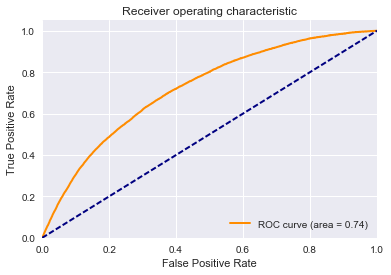

In [0]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = 0.74)')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()